<a href="https://colab.research.google.com/github/shmanth/Inventory_management_using_Reinforcement_Learning-Q-Learning-/blob/master/Q_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
%run "/content/drive/MyDrive/Colab Notebooks/IM_env.ipynb"

In [4]:
%load "/content/drive/MyDrive/Colab Notebooks/IM_env.ipynb"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
import collections
import random
import numpy as np
import pickle

In [6]:
m= 50 # max capacity of the warehouse

## Code to initialise empty dictionary, if Q-dictionary does not exist

In [7]:
Q_dict = collections.defaultdict(dict)

States_track = collections.defaultdict(dict)

rewards_tracked = {(15,0):[],(25,1):[], (20,2): [], (30,3):[], (35,4):[], (10,5):[],(50,6):[]}

print(len(Q_dict))
print(len(States_track))
print(len(rewards_tracked))

0
0
7


Code to run If Q-dictionary exists to import the latest dictionary

In [8]:
# with open("Policy.pkl", "rb") as handle:
#   Q_dict = pickle.load(handle)

# with open("Rewards.pkl", "rb") as handle:
#   rewards_tracked = pickle.load(handle)

# with open("States_track.pkl", "rb") as handle:
#   States_track = pickle.load(handle)

In [9]:
# defining a function to give valid actions given the state
def valid_actions(state):

  state = int(state[0])
  valid_actions = []

  for ix in range(0,m+1):
    valid_actions.append(ix)
  return valid_actions

In [10]:
def add_to_dict(state, valid_act):

  if state not in Q_dict.keys():
    Q_dict[state] = {}
    for action in valid_act:
      Q_dict[state][action] = 0.0

In [11]:
# defining a function to save Q-dictionary as a pickle file

def save_obj(obj, name):
  with open(name + ".pkl", "wb") as f:
    pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [12]:
#This function will initialise the seven Q-values which need to be tracked for checking convergence

def initialize_tracking_states():

  sample_q_values= [((15,0),12),((25,1),25),((20,2),10),((30,3),30),((35,4),15),((10,5),18),((50,6),10)]    #select any 4 Q-values
  for q_value in sample_q_values:
    state = q_value[0]
    action = q_value[1]
    States_track[state][action] = []    #this is an array which will have appended values of that state-action pair for every 2000th episode

In [13]:
#This function will append latest Q-values of the 4 Q-values which are being tracked for checking convergence

def save_tracking_states():
  for state in States_track.keys():
    for action in States_track[state].keys():
      if state in Q_dict and action in Q_dict[state]:
        States_track[state][action].append(Q_dict[state][action])

In [14]:
def epsilon_greedy(state, time):
  epsilon = -1/(1+np.exp((-time + 7500000)/1700000)) + 1
  z = np.random.random()

  if z > epsilon:
    action = max(Q_dict[state], key = Q_dict[state].get) #Exploitation: this gets the action corresponding to max q-value of current state
  else:
    action = np.random.choice(np.arange(0, m+1))  #Exploration: randomly choosing and action

  return action

# Training

In [15]:
# Defining parameters for the experiment

episodes = 20
steps = 2 # days
LR = 0.01 # learning rate
gamma = 0.91

threshold = 1  #every these many episodes, the 4 Q-values will be stored/appended (convergence graphs)
policy_threshold = 3 #every these many episodes, the Q-dict will be updated

In [16]:
for episode in range(0,episodes):

  env = InventoryEnv()

  initial_state = env.state
  current_state = env.state

  add_to_dict(current_state, valid_actions(current_state))

  time_step = 0
  reward = None
  current_action = np.random.choice(np.arange(0, m+1))

  next_state = env.initial_step(current_state, current_action)
  add_to_dict(next_state, valid_actions(next_state))
  current_state = next_state

  total_reward = 0

  while time_step < steps:

    current_action = epsilon_greedy(current_state, episode)

    next_state, reward = env.step(current_state, current_action)

    add_to_dict(next_state, valid_actions(next_state))

    max_next = max(Q_dict[next_state], key = Q_dict[next_state].get) #this gets the action corresponding to max q-value of next state

    Q_dict[current_state][current_action] += LR * ((reward + (gamma* (Q_dict[next_state][max_next]))) - Q_dict[current_state][current_action])

    current_state = next_state

    total_reward += reward

    time_step += 1

    if initial_state in rewards_tracked:
      rewards_tracked[initial_state].append(total_reward)

    if ((episode + 1) % threshold) == 0:
      save_obj(rewards_tracked, "Rewards")

    if (episode == threshold - 1):
      initialize_tracking_states()

    if ((episode+1) % threshold) == 0:
      save_tracking_states()
      save_obj(States_track, "States_tracked")

    if (episode+1) % policy_threshold == 0:
      save_obj(Q_dict, "Policy")

save_obj(rewards_tracked,'Rewards')
save_obj(States_track,'States_tracked')
save_obj(Q_dict,'Policy')
print(episode)

19


In [17]:
episode

19

In [18]:
save_obj(rewards_tracked,'Rewards')
save_obj(States_track,'States_tracked')
save_obj(Q_dict,'Policy')

In [19]:
len(Q_dict.keys()) #max should be 51*7

65

In [20]:
51 * 7

357

In [21]:
Q_dict

defaultdict(dict,
            {(21, 2): {0: 0.0,
              1: 0.0,
              2: 0.0,
              3: 0.0,
              4: 0.0,
              5: 0.0,
              6: 0.0,
              7: 0.0,
              8: 0.0,
              9: 0.0,
              10: 0.0,
              11: 0.0,
              12: 0.0,
              13: 0.0,
              14: 0.0,
              15: 0.0,
              16: 0.0,
              17: 0.0,
              18: 0.0,
              19: 0.0,
              20: 0.0,
              21: 0.0,
              22: 0.0,
              23: 0.0,
              24: 0.0,
              25: 0.0,
              26: 0.0,
              27: 0.0,
              28: 0.0,
              29: 0.0,
              30: 0.0,
              31: 0.0,
              32: 0.0,
              33: 0.0,
              34: 0.0,
              35: 0.0,
              36: 0.0,
              37: 0.0,
              38: 0.0,
              39: 0.0,
              40: 0.0,
              41: 0.0,
              42:

In [22]:
total_reward

-107.155

In [23]:
States_track

defaultdict(dict,
            {(15, 0): {12: []},
             (25, 1): {25: []},
             (20, 2): {10: []},
             (30, 3): {30: []},
             (35, 4): {15: []},
             (10, 5): {18: []},
             (50,
              6): {10: [0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0,
               0.0]}})

In [24]:
rewards_tracked

{(15, 0): [],
 (25, 1): [],
 (20, 2): [],
 (30, 3): [],
 (35, 4): [],
 (10, 5): [],
 (50, 6): []}

In [25]:
first_key = next(iter(rewards_tracked))
value_of_first_key = rewards_tracked[first_key]

# Now you can use value_of_first_key as needed
print(value_of_first_key)

[]


In [26]:
rewards_tracked.get(rewards_tracked.keys()[0])

TypeError: ignored

## Memory Requirements

In [27]:
# no. of state action pairs

state_space = 51 *51* 7

print (state_space)

18207


In [28]:
#For tracking convergence, 4 Q-values will be tracked. These values are saved after every 2000 episodes.

no_of_q_values_tracked = 4 * 20/1
print(no_of_q_values_tracked)


80.0


## epsilon greedy curve

In [29]:
from matplotlib import pyplot as plt
%matplotlib inline

In [30]:
time = np.arange(1000000,1000100)
epsilon = []
for ix in range(1000000, 1000100):
  epsilon.append(10/ np.log(ix + 0.0000001))

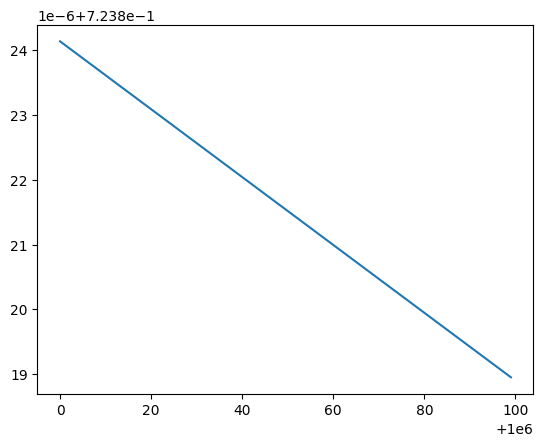

In [31]:
plt.plot(time, epsilon)
plt.show()

In [32]:
np.random.random()
#this has range (0,1)

0.2773084268505608

In [33]:
epsilon[0]

0.7238241365054144

In [34]:
Q_dict[(10,6)]

{}